# Sentinel-3 OLCI for Landiras 2022 fire

In [13]:
import openeo
import xarray
import matplotlib.pyplot as plt

connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection

<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with NullAuth>

In [14]:
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [32]:
s3_cube = connection.load_collection(
    "SENTINEL3_OLCI_L1B",
    temporal_extent=("2022-07-12", "2022-07-18"),
    spatial_extent={
        "west": -0.86,
        "south": 44.411911,
        "east": -0.38,
        "north": 44.617554,
        "crs": "EPSG:4326",
    },
    bands=["B08", "B06", "B04","B17","B05","B02"],
)

In [33]:
%%time
s3_cube.download("s3_landiras_2022.nc")

CPU times: user 22.1 ms, sys: 16.4 ms, total: 38.5 ms
Wall time: 12.7 s


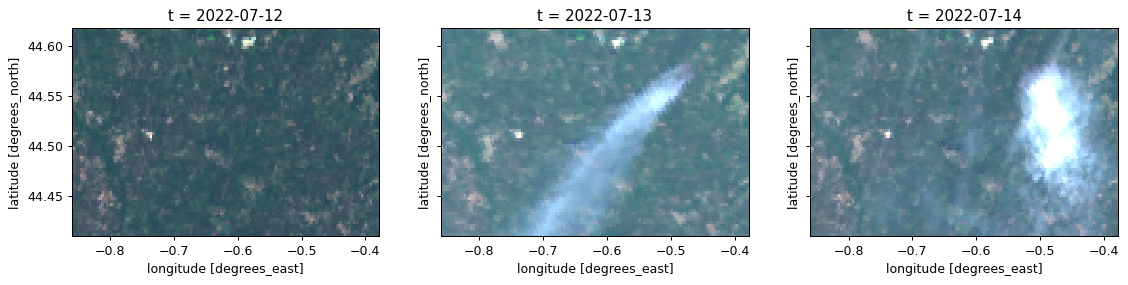

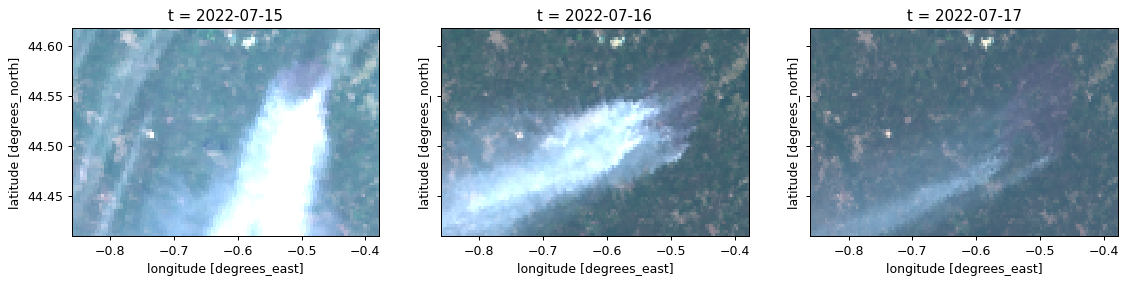

In [35]:
ds = xarray.load_dataset("s3_landiras_2022.nc")
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B08", "B06", "B04"]].to_array(dim="bands")


fig, axes = plt.subplots(ncols=3, figsize=(15, 3), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(ax=axes[0],vmin=0,vmax=0.2)
data[{"t": 1}].plot.imshow(ax=axes[1],vmin=0,vmax=0.2)
data[{"t": 2}].plot.imshow(ax=axes[2],vmin=0,vmax=0.2);

fig, axes = plt.subplots(ncols=3, figsize=(15, 3), dpi=90, sharey=True)
data[{"t": 3}].plot.imshow(ax=axes[0],vmin=0,vmax=0.2)
data[{"t": 4}].plot.imshow(ax=axes[1],vmin=0,vmax=0.2)
data[{"t": 5}].plot.imshow(ax=axes[2],vmin=0,vmax=0.2);

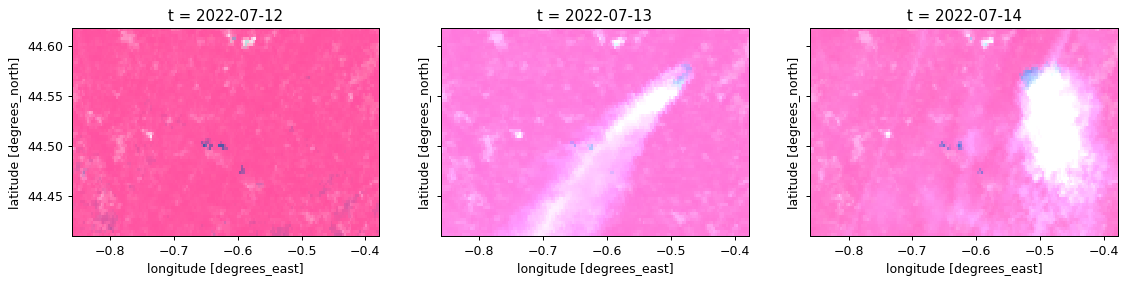

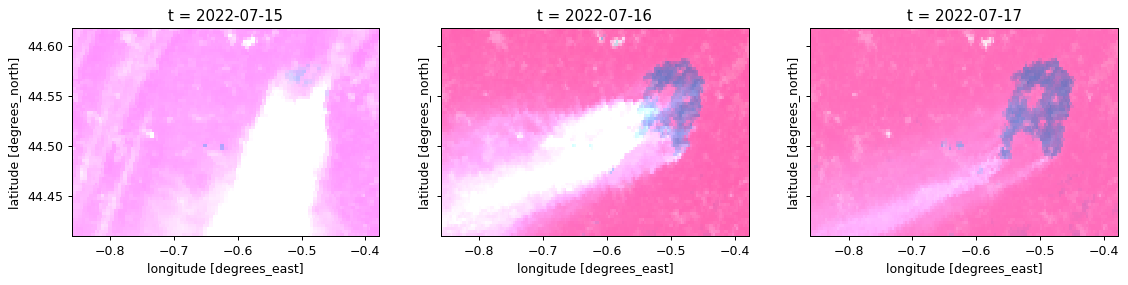

In [38]:
ds = xarray.load_dataset("s3_landiras_2022.nc")
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B17", "B05", "B02"]].to_array(dim="bands")


fig, axes = plt.subplots(ncols=3, figsize=(15, 3), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(ax=axes[0],vmin=0,vmax=0.2)
data[{"t": 1}].plot.imshow(ax=axes[1],vmin=0,vmax=0.2)
data[{"t": 2}].plot.imshow(ax=axes[2],vmin=0,vmax=0.2);

fig, axes = plt.subplots(ncols=3, figsize=(15, 3), dpi=90, sharey=True)
data[{"t": 3}].plot.imshow(ax=axes[0],vmin=0,vmax=0.2)
data[{"t": 4}].plot.imshow(ax=axes[1],vmin=0,vmax=0.2)
data[{"t": 5}].plot.imshow(ax=axes[2],vmin=0,vmax=0.2);

## Check out all bands

In [22]:
s3_cube = connection.load_collection(
    "SENTINEL3_OLCI_L1B",
    temporal_extent=("2022-07-17", "2022-07-18"),
    spatial_extent={
        "west": -0.86,
        "south": 44.411911,
        "east": -0.38,
        "north": 44.617554,
        "crs": "EPSG:4326",
    },
)

In [23]:
%%time
s3_cube.download("s3_landiras_2022_allbands.nc")

CPU times: user 19.9 ms, sys: 13.3 ms, total: 33.2 ms
Wall time: 15.5 s


In [24]:
ds = xarray.load_dataset("s3_landiras_2022_allbands.nc")
ds

<xarray.Dataset> Size: 954kB
Dimensions:  (t: 1, x: 162, y: 70)
Coordinates:
  * t        (t) datetime64[ns] 8B 2022-07-17
  * x        (x) float64 1kB -0.8585 -0.8555 -0.8526 ... -0.3853 -0.3823 -0.3793
  * y        (y) float64 560B 44.62 44.61 44.61 44.61 ... 44.42 44.41 44.41
Data variables: (12/22)
    crs      |S1 1B b''
    B01      (t, y, x) float32 45kB 0.158 0.1602 0.1595 ... 0.1609 0.1589 0.1601
    B02      (t, y, x) float32 45kB 0.1466 0.1481 0.1472 ... 0.1476 0.1481
    B03      (t, y, x) float32 45kB 0.1219 0.1239 0.1234 ... 0.1222 0.1227
    B04      (t, y, x) float32 45kB 0.09548 0.09695 0.09607 ... 0.09451 0.09568
    B05      (t, y, x) float32 45kB 0.08881 0.09065 0.08906 ... 0.08675 0.08841
    ...       ...
    B16      (t, y, x) float32 45kB 0.2406 0.2628 0.2347 ... 0.1786 0.1847
    B17      (t, y, x) float32 45kB 0.2697 0.2958 0.2613 ... 0.1988 0.2071
    B18      (t, y, x) float32 45kB 0.2725 0.2989 0.2637 ... 0.209 0.2001 0.2089
    B19      (t, y, x) float32 45kB 0.1913 0.2102 0.1856 ... 0.1393 0.1457
    B20      (t, y, x) float32 45kB 0.06571 0.07163 0.06307 ... 0.047 0.04972
    B21      (t, y, x) float32 45kB 0.2882 0.3167 0.2785 ... 0.2121 0.2249
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

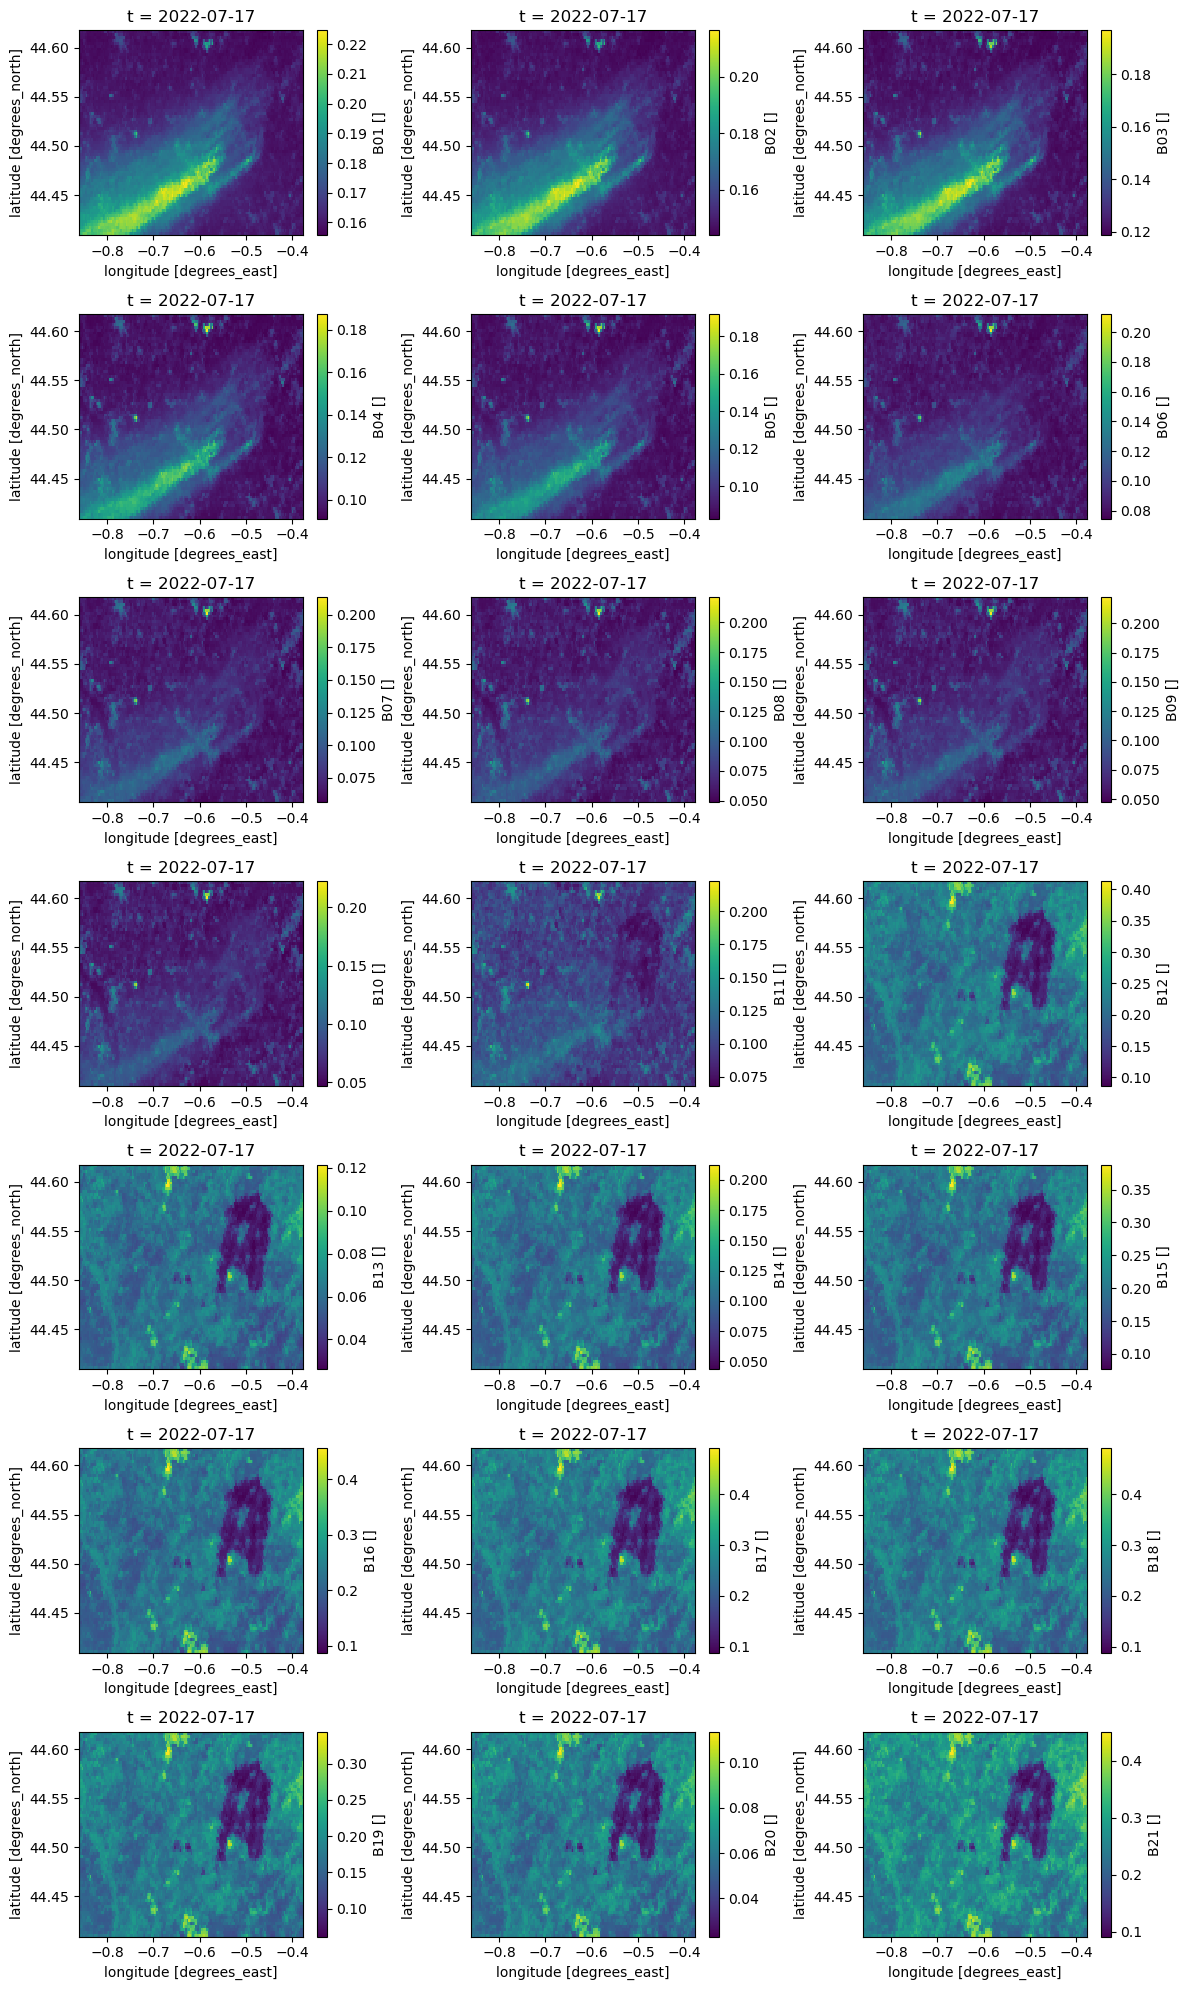

In [31]:
plt.figure(figsize=(12,20))

for iii,channel in enumerate(ds.data_vars):
    if channel.startswith('B'):
        # Convert xarray DataSet to a (bands, t, x, y) DataArray
        data = ds[channel]
        
        plt.subplot(7,3,iii)
        data[{"t": 0}].plot.imshow()
        
plt.tight_layout()